 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
algo_returns_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [12]:
# Check Data Types
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].replace({'\$':''}, regex=True).astype(float)

In [14]:
sp500_history_df


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [15]:
#Calculate daily returns
sp500_history_df.drop(columns=['Date'], inplace=True)

In [16]:
sp500_history_df

,Close
0,2933.68
1,2907.97
2,2905.03
3,2900.45
4,2907.06
...,...
1644,1460.93
1645,1461.40
1646,1450.99
1647,1445.75


In [17]:
sp500_history_df.columns = ['SP500']
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,SP500
1,-0.008764
2,-0.001011
3,-0.001577
4,0.002279
5,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()
combined_df.drop(columns=['Date'], inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
6,-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
7,0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
8,0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
9,-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
10,0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:>

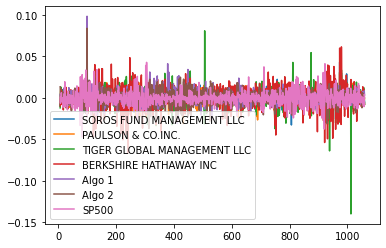

In [19]:
# Plot daily returns
daily_returns = combined_df
daily_returns.plot()

<AxesSubplot:>

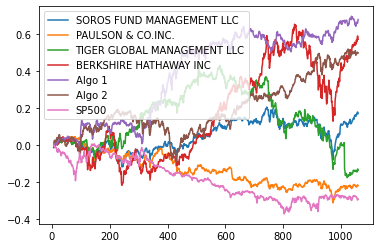

In [21]:
# Plot cumulative returns
cumulative_returns=(1 + daily_returns).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

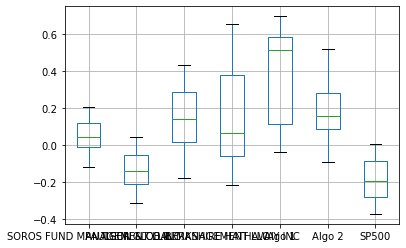

In [22]:
# Box plot to visually show risk
cumulative_returns.boxplot()

In [28]:
# Daily Standard Deviations
daily_std = daily_returns.std()
daily_std
# Which portfolios are riskier than the S&P 500?
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012850
TIGER GLOBAL MANAGEMENT LLC    0.010845
SP500                          0.008553
Algo 2                         0.008265
SOROS FUND MANAGEMENT LLC      0.007855
Algo 1                         0.007745
PAULSON & CO.INC.              0.006988
dtype: float64

In [26]:
# Determine which portfolios are riskier than the S&P 500


In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203994
TIGER GLOBAL MANAGEMENT LLC    0.172156
SP500                          0.135777
Algo 2                         0.131206
SOROS FUND MANAGEMENT LLC      0.124700
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:>

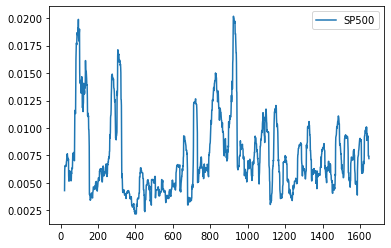

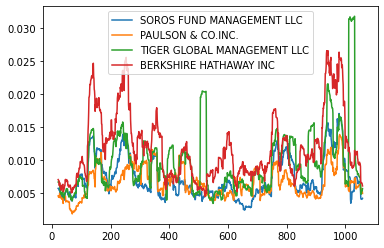

In [147]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_history_df.rolling(window=21).std().plot()
whale_returns_df.rolling(window=21).std().plot()

In [33]:
# Construct a correlation table
combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091,-0.036216
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532,-0.020471
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470,0.032741
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006,-0.002710
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996,-0.020353
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000,-0.028751
SP500,-0.036216,-0.020471,0.032741,-0.002710,-0.020353,-0.028751,1.000000


In [38]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance=daily_returns['Algo 1'].cov(daily_returns['SP500'])
covariance
variance=daily_returns['Algo 1'].var()
algo1_beta=covariance / variance
algo1_beta

-0.022477573447791246

In [40]:
# Calculate a rolling window using the exponentially weighted moving average. 


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [42]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.367157
PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
BERKSHIRE HATHAWAY INC         0.633782
Algo 1                         1.070733
Algo 2                         0.804573
SP500                         -0.535728
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

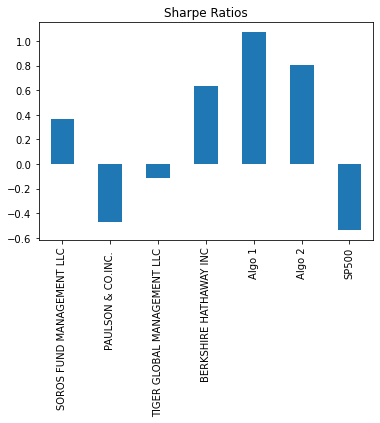

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: It tells us that they had the highest reward for the risk incurred.  

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [133]:
# Read the first stock
employer_returns_csv = Path("Resources/stock_data.csv")
employer_returns_df = pd.read_csv(employer_returns_csv)
employer_returns_df.head()

,UBA,PGRE,REG
0,20.67,15.21,58.55
1,20.48,14.98,57.70
2,20.23,14.55,56.40
3,20.41,14.47,56.29
4,20.39,14.41,56.27


In [134]:
# Concatenate all stocks into a single DataFrame
employer_returns_df=employer_returns_df.reset_index()
employer_returns_df = employer_returns_df.pct_change()
employer_returns_df.head()

,index,UBA,PGRE,REG
0,NaN,NaN,NaN,NaN
1,inf,-0.009192,-0.015122,-0.014518
2,1.000000,-0.012207,-0.028705,-0.022530
3,0.500000,0.008898,-0.005498,-0.001950
4,0.333333,-0.000980,-0.004147,-0.000355


In [113]:
employer_returns_df.dropna(inplace=True)

In [114]:
employer_returns_df


,index,UBA,PGRE,REG
1,inf,-0.009192,-0.015122,-0.014518
2,1.000000,-0.012207,-0.028705,-0.022530
3,0.500000,0.008898,-0.005498,-0.001950
4,0.333333,-0.000980,-0.004147,-0.000355
5,0.250000,0.000490,0.002082,-0.010130
...,...,...,...,...
244,0.004115,-0.003638,-0.004808,-0.005052
245,0.004098,0.021451,0.006211,-0.002389
246,0.004082,0.017873,-0.000686,-0.007485
247,0.004065,-0.011853,-0.017159,-0.017798


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [138]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = 1/3 * employer_returns_df['UBA'] + 1/3*employer_returns_df['PGRE'] + 1/3*employer_returns_df['REG']
portfolio_returns.head()

0         NaN
1   -0.012944
2   -0.021147
3    0.000483
4   -0.001827
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [139]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df, portfolio_returns], axis='columns', join='inner')
combined_df.sort_index(inplace=True)

combined_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,SP500,0
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,0.000630,0.016724
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,-0.006566,0.009364
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,-0.000038,0.011417
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,-0.003466,-0.003446
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,0.006105,0.006043


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [132]:
# Risk
daily_std2 = combined_df.std()
daily_std2


SOROS FUND MANAGEMENT LLC      0.008833
PAULSON & CO.INC.              0.006289
TIGER GLOBAL MANAGEMENT LLC    0.009386
BERKSHIRE HATHAWAY INC         0.014908
Algo 1                         0.009128
Algo 2                         0.008516
SP500                          0.009550
0                              0.011175
dtype: float64

<AxesSubplot:>

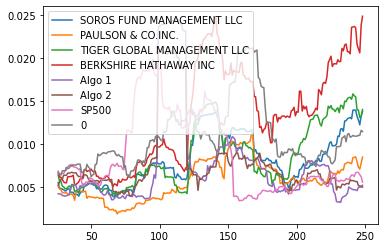

In [140]:
# Rolling
combined_df.rolling(window=21).std().plot()

In [141]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.526321
PAULSON & CO.INC.             -0.549640
TIGER GLOBAL MANAGEMENT LLC    0.243795
BERKSHIRE HATHAWAY INC        -0.537736
Algo 1                         0.976889
Algo 2                         1.318399
SP500                         -0.510682
0                              0.605853
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

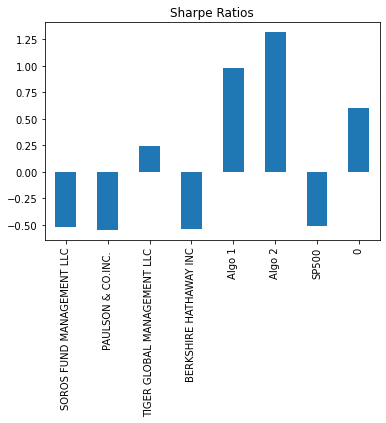

In [142]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [145]:
# Create a correlation analysis
combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.836249,0.829458,0.774677,-0.030583,0.000923,-0.054897,-0.066230
PAULSON & CO.INC.,0.836249,1.000000,0.738550,0.671058,-0.013442,-0.025787,-0.038791,-0.069288
TIGER GLOBAL MANAGEMENT LLC,0.829458,0.738550,1.000000,0.687027,-0.032292,-0.039045,0.035001,-0.082067
BERKSHIRE HATHAWAY INC,0.774677,0.671058,0.687027,1.000000,-0.029257,0.022903,-0.014134,-0.021016
Algo 1,-0.030583,-0.013442,-0.032292,-0.029257,1.000000,0.524770,-0.116802,-0.027479
Algo 2,0.000923,-0.025787,-0.039045,0.022903,0.524770,1.000000,-0.136700,0.007430
SP500,-0.054897,-0.038791,0.035001,-0.014134,-0.116802,-0.136700,1.000000,-0.122393
0,-0.066230,-0.069288,-0.082067,-0.021016,-0.027479,0.007430,-0.122393,1.000000


In [149]:
# Beta
covariance1=combined_df[].cov(combined_df['SP500'])
covariance
variance1=combined_df[].var()
Zero_beta=covariance1 / variance1
Zero_beta

SyntaxError: invalid syntax (<ipython-input-149-f386916f51ac>, line 2)